# 第五章：探索性数据分析(EDA)

   **没有一成不变的统计问题，统计上的一成不变都是有问题的。——Sir David Cox**

                                           

### 1. 简介

本章将展示如何使用可视化方法和数据转换来系统化地探索数据，统计学家将这项任务称为探索性数据分析（exploratory data analysis，EDA）。EDA 是一个可迭代的循环过程，具有以下作用。
* 对数据提出问题。
* 对数据进行可视化、转换和建模，进而找出问题的答案。
* 使用上一个步骤的结果来精炼问题，并提出新问题。

> *实现工具：plotnine & pandas*
> 
> **EDA 本质上是一个创造性过程。和多数创造性过程一样，问题的质量关键在于问题的数量。分析过程的开始阶段很难提出有启发性的问题，因为你并不知道数据集中包含了哪些真知灼见。另一方面，你提出的每个新问题都可以揭示数据中的新内容，并增加发现知识的机会。如果在知识发现的基础上不断使用新问题来补充每个老问题，那么你就可以快速地获取数据中最令人感兴趣的部分，并总结出一组发人深省的问题。**

### 2.对分布进行可视化表示

对变量分布进行可视化的方法取决于变量是分类变量还是连续变量。如果仅在较小的集合内取值，那么这个变量就是分类变量。要想检查分类变量的分布，可以使用条形图：

In [122]:
from plotnine import *
from plotnine.data import diamonds,faithful,mpg
import pandas as pd
import numpy as np

In [7]:
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


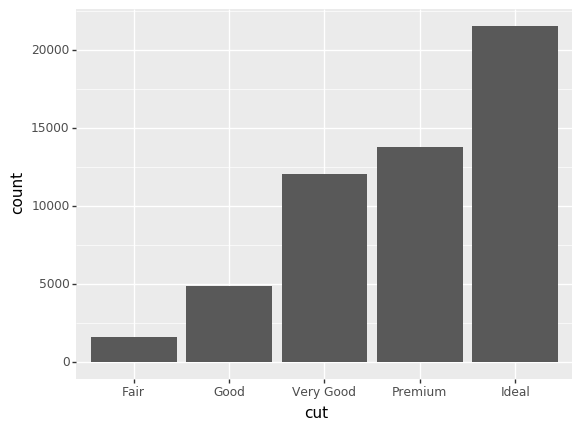

<ggplot: (-9223371950272589448)>

In [8]:
#分类变量可视化——条形图
(
ggplot(diamonds)  
+ geom_bar(aes(x = 'cut'))   #条形的高度表示每个 x 值中观测的数量
)


In [117]:
#也可以使用 count() 手动计算出这些值
data = pd.read_csv('diamonds.csv')
data.groupby(by ='cut').count()

,carat,color,clarity,depth,table,price,x,y,z
cut,,,,,,,,,
Fair,1610,1610,1610,1610,1610,1610,1610,1610,1610
Good,4906,4906,4906,4906,4906,4906,4906,4906,4906
Ideal,21551,21551,21551,21551,21551,21551,21551,21551,21551
Premium,13791,13791,13791,13791,13791,13791,13791,13791,13791
Very Good,12082,12082,12082,12082,12082,12082,12082,12082,12082


***
如果可以在无限大的有序集合中任意取值，那么这个变量就是连续变量。数值型和日期时间型变量就是连续变量的两个例子。要想检查连续变量的分布，可以使用直方图：

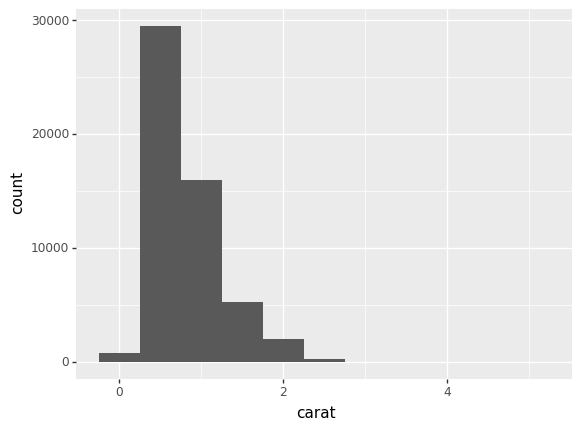

<ggplot: (-9223371950272416784)>

In [11]:
#连续变量可视化——直方图
(
ggplot(diamonds) 
+ geom_histogram(aes(x = 'carat'),binwidth = 0.5)
)

In [19]:
#也可以通过 pd.cut函数来手动计算结果：

bins = [-0.25, 0.25, 0.75, 1.25, 1.75, 2.25, 2.75]
a = pd.cut(diamonds['carat'], bins)
pd.value_counts(a)

(0.25, 0.75]     29498
(0.75, 1.25]     15977
(1.25, 1.75]      5313
(1.75, 2.25]      2002
(-0.25, 0.25]      785
(2.25, 2.75]       322
Name: carat, dtype: int64

直方图对 x 轴进行等宽分箱，然后使用条形的高度来表示落入每个分箱的观测的数量。在上图中，最高的条形表示几乎有 30000 个观测的 carat 值在 0.25 和 0.75 之间，这两个值分别是条形的左侧值和右侧值。

你可以使用 binwidth 参数来设定直方图中的间隔的宽度，该参数是用 x 轴变量的单位来度量的。在使用直方图时，你应该试验一下不同的分箱宽度，因为不同的分箱宽度可以揭示不同的模式。例如，如果只考虑重量小于 3 克拉的钻石，并选择一个更小的分箱宽度，那么直方图如下所示：

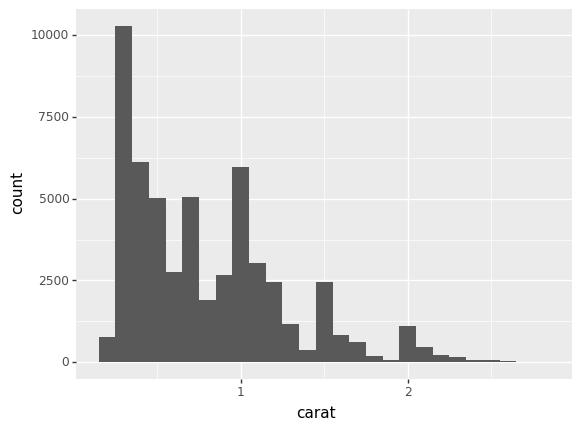

<ggplot: (-9223371950272413024)>

In [22]:
df=data[data.carat<3] #只考虑重量小于 3 克拉的钻石
(
ggplot(df,aes(x = 'carat')) 
+ geom_histogram(binwidth = 0.1) #更小的分箱宽度
)

如果想要在同一张图上叠加多个直方图，那么我们建议你使用 geom_freqploy() 函数来代替geom_histogram() 函数。 geom_freqploy() 可以执行和 geom_histogram() 同样的计算过程，但前者不使用条形来显示计数，而是使用折线。叠加的折线远比叠加的条形更容易理解：

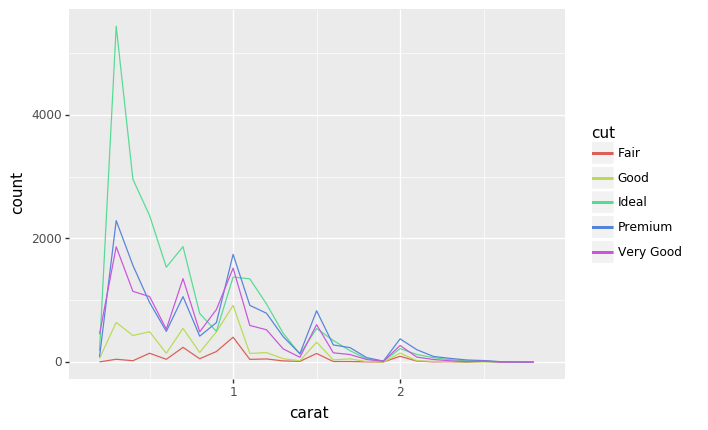

<ggplot: (-9223371950272351912)>

In [23]:
# 叠加的折线
(
ggplot(df,aes(x = 'carat',color = 'cut')) 
+ geom_freqpoly(binwidth = 0.1)
)

***************
### 3.典型值

条形图和直方图都用比较高的条形表示变量中的常见值，而用比较矮的条形表示变量中不常见的值。没有条形的位置表示数据中没有这样的值。为了将这些信息转换为有用的问题，我们看看是否具有意料之外的情况。
* 哪些值是最常见的？为什么？
* 哪些值是非常罕见的？为什么？这和你的预期相符吗？
* 你能发现任何异乎寻常的模式吗？如何解释

> 作为示例，可以从以下直方图发现几个有趣的问题。
> 1. 为什么重量为整数克拉和常见分数克拉的钻石更多？
> 2. 为什么位于每个峰值稍偏右的钻石比稍偏左的钻石更多？
> 3. 为什么没有重量超过 3 克拉的钻石？

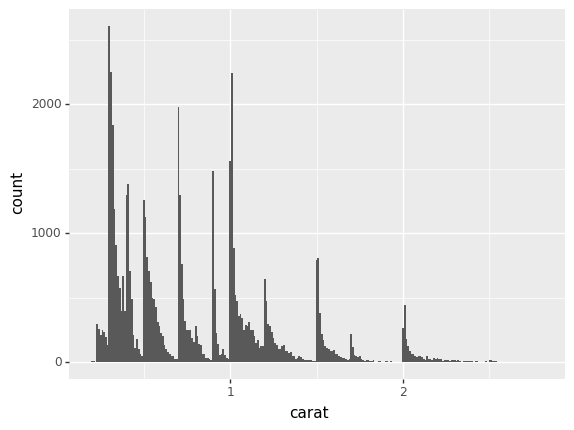

<ggplot: (-9223371950271762604)>

In [24]:
(
ggplot(df,aes(x = 'carat')) 
+ geom_histogram(binwidth = 0.01)
)

> 一般来说，相似值聚集形成的簇表示数据中存在子组。为了理解子组，我们提出以下问题。
> + 每个簇中的观测是如何相似的？
> + 不同簇之间的观测是如何不相似的？
> + 如何解释或描述各个簇？
> + 为什么有些簇的外观可能具有误导作用？

以下的直方图显示了美国黄石国家公园中的老忠实喷泉的 272 次喷发的时长（单位为分钟）。喷发时间似乎聚集成了两组：短喷发（2 分钟左右）和长喷发（4~5 分钟），这两组间几乎没有其他喷发时间：

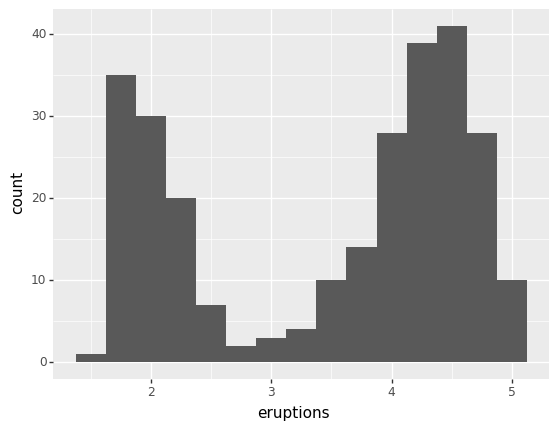

<ggplot: (-9223371890040819972)>

In [54]:
(
ggplot(faithful, aes(x = 'eruptions'))
+ geom_histogram(binwidth = 0.25)
)

### 4.异常值

异常值是与众不同的观测或者是模式之外的数据点。有时异常值是由于数据录入错误而产生的；有时异常值则能开辟出一块重要的新科学领域。如果数据量比较大，有时很难在直方图上发现异常值。例如，查看钻石数据集中 y 轴变量的分布，唯一能表示存在异常值的证据是，y 轴的取值范围出奇得宽：

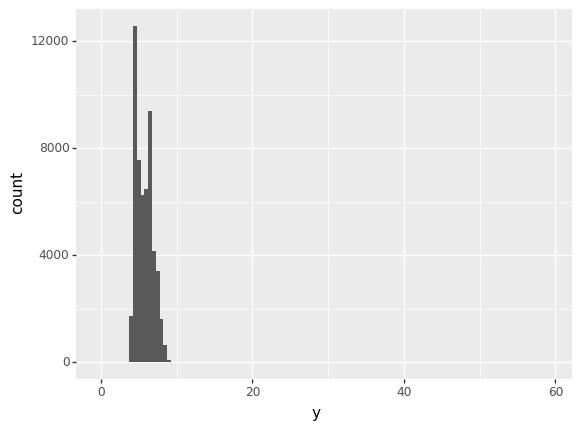

<ggplot: (-9223371890040803936)>

In [56]:
(
ggplot(diamonds, aes(x = 'y'))
+ geom_histogram(binwidth = 0.5)
)

正常值分箱中的观测太多了，以致于包括异常值的分箱高度太低，因此我们根本看不见（如果仔细观察 x 轴 0 刻度附近，没准你能发现点什么）。为了更容易发现异常值，我们可以使用 coord_cartesian() 函数将 y 轴靠近 0 的部分放大：

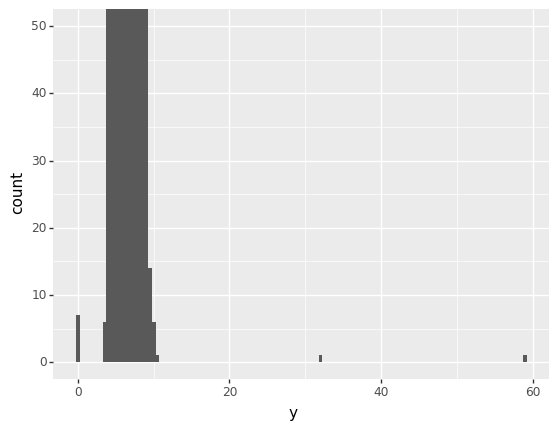

<ggplot: (-9223371890040823152)>

In [59]:
(
ggplot(diamonds, aes(x = 'y'))
+ geom_histogram(binwidth = 0.5)
+ coord_cartesian(ylim = (0,50))
)

这样一来，我们就可以看出有 3 个异常值，分别位于 0、30 左右和 60 左右。我们使用筛选和sort函数将它们找出来：

In [87]:
a=data[(data.y < 3) | (data.y > 20)]
a.sort_values('y')

,carat,cut,color,clarity,depth,table,price,x,y,z
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.0,0.00
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.0,0.00
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.00,0.0,0.00
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.00,0.0,0.00
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.00,0.0,0.00
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.0,0.00
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.0,0.00
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06


y 变量测量钻石的三个维度之一，单位为毫米。我们知道钻石的宽度不可能是 0 毫米，因此这些值肯定是错误的。我们也完全可以认为 32 毫米和 59 毫米同样是令人难以置信的，这样的钻石长度超过 1 英寸（1 英寸 =2.54 厘米），简直就是无价之宝！

使用带有异常值和不带异常值的数据分别进行分析，是一种良好的做法。如果两次分析的结果差别不大，而你又无法说明为什么会有异常值，那么完全可以用缺失值替代异常值，然后继续进行分析。但如果两次分析的结果有显著差别，那么你就不能在没有正当理由的情况下丢弃它们。你需要弄清出现异常值的原因（如数据输入错误），并在文章中说明丢弃它们的理由。

### 5.缺失值

如果在数据集中发现异常值，但只想继续进行其余的分析工作，那么有 2 种选择。
1. 将带有可疑值的行全部丢弃：

In [30]:
#可疑值的行全部丢弃
df=data.copy()
b=df[(df.y < 20) | (data.y > 3)]
b

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


我们不建议使用这种方式，因为一个无效测量不代表所有测量都是无效的。此外，如果数据质量不高，若对每个变量都采取这种做法，那么你最后可能会发现数据已经所剩无几！
2. 相反，我们建议使用缺失值来代替异常值。

In [38]:
#用缺失值来代替异常值
df.y[(df['y'] > 20) | (df['y'] < 3)] = np.nan



E:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


E:\anaconda\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_point : Removed 9 rows containing missing values.


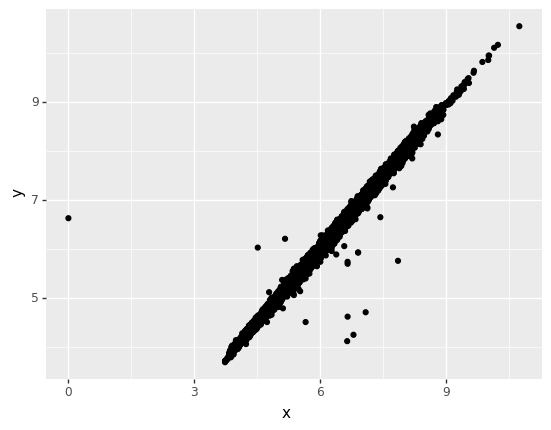

<ggplot: (-9223371950272516016)>

In [39]:
# 和 R 一样，ggplot2 也遵循不能无视缺失值的原则。因为无法明确地绘制出缺失值，所以ggplot2 在绘图时会忽略缺失值，
# 但会提出警告以通知缺失值被丢弃了：
(
ggplot(df, aes(x = 'x', y = 'y'))  
+ geom_point()
)   



****
有时你会想弄清楚造成有缺失值的观测和没有缺失值的观测间的区别的原因。例如，在flights.csv 中， dep_time 变量中的缺失值表示航班取消了。因此，你应该比较一下已取消航班和未取消航班的计划出发时间。可以使用 np.isnan() 函数创建一个新变量来完成这个操作：

In [46]:
flights = pd.read_csv('flights.csv')
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-1-1 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-1-1 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-1-1 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-1-1 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-1-1 6:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-9-30 14:00
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-9-30 22:00
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-9-30 12:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-9-30 11:00


In [47]:
flights['cancelled'] = np.isnan(flights.dep_time)
flights['sched_hour'] = flights.sched_dep_time // 100
flights['sched_min'] = flights.sched_dep_time % 100
flights['sched_dep_time'] = flights['sched_hour'] + flights['sched_min'] / 60


In [48]:
flights['cancelled'].describe

<bound method NDFrame.describe of 0         False
1         False
2         False
3         False
4         False
          ...  
336771     True
336772     True
336773     True
336774     True
336775     True
Name: cancelled, Length: 336776, dtype: bool>

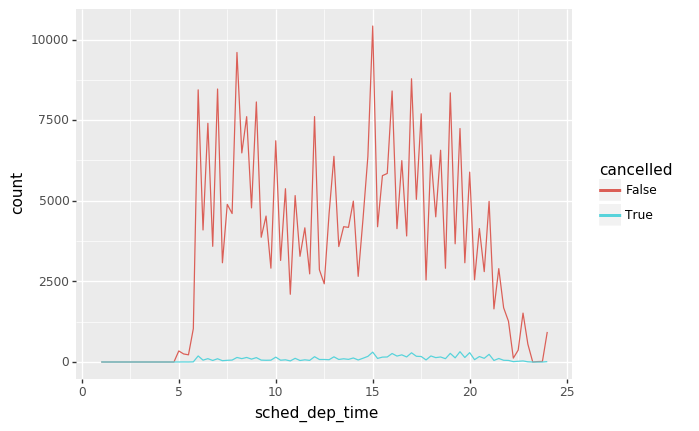

<ggplot: (-9223371950267760712)>

In [50]:
(
ggplot(flights,aes('sched_dep_time',color = 'cancelled'))  
+ geom_freqpoly(binwidth = 1/4)
)       
# 但是这张图的效果并不怎么好，因为未取消航班的数量远远多于已取消航班的数量。

****
### 6.相关变动
如果变动描述的是一个变量内部的行为，那么相关变动描述的就是多个变量之间的行为。相关变动是两个或多个变量以相关的方式共同变化所表现出的趋势。查看相关变动的最好方式是将两个或多个变量间的关系以可视化的方式表现出来。如何进行这种可视化表示同样取决于相关变量的类型。

我们经常需要探索连续变量的分布，这种分布按照一个分类变量的值可以分为几个组，就像前面的频率多边形图一样。 geom_freqpoly() 的默认外观不太适合这种比较，因为高度是由计数给出的。这就意味着，如果一组观测的数量明显少于其他组的话，就很难看出形状上的差别。举个例子，我们探索一下钻石价格是如何随着质量而变化的：

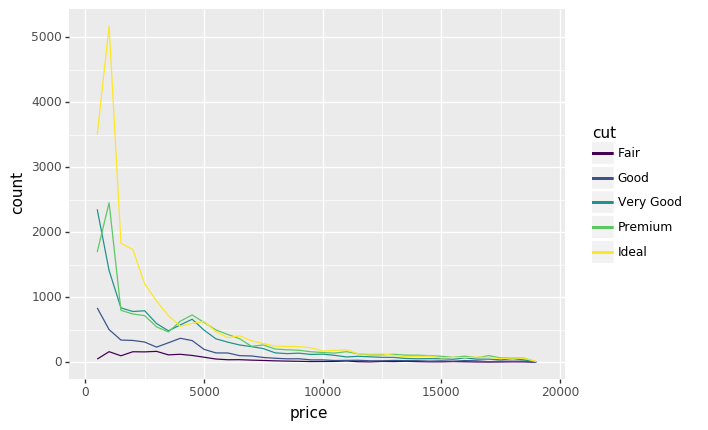

<ggplot: (-9223371890038538800)>

In [176]:
(
ggplot(diamonds,aes(x = 'price'))  
+ geom_freqpoly(aes(color = 'cut'),binwidth = 500)
)

很难看出分布上的差别，因为总体看来各组数量的差别太大了：

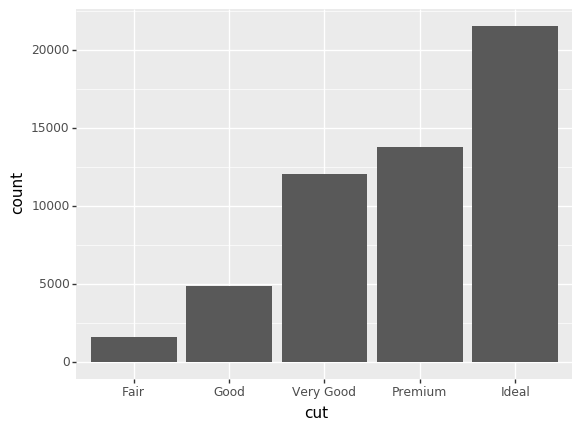

<ggplot: (-9223371890038933452)>

In [179]:
(
ggplot(diamonds)  
+ geom_bar(aes(x = 'cut'))
)


为了让比较变得更容易，需要改变 y 轴的显示内容，不再显示计数，而是显示密度。密度是对计数的标准化，这样每个频率多边形下边的面积都是 1：

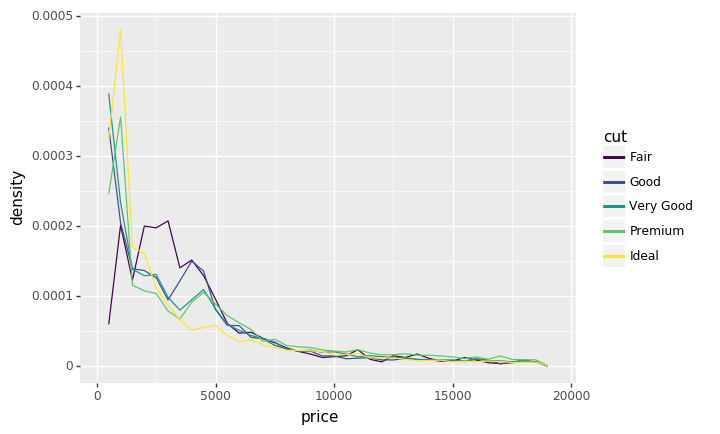

<ggplot: (-9223371890044863788)>

In [180]:
(
ggplot(diamonds,aes(x = 'price',y = "..density.."))  
+ geom_freqpoly(aes(color = 'cut'),binwidth = 500)
)

这张图的部分内容非常令人惊讶，其显示出一般钻石（质量最差）的平均价格是最高的！但这可能是因为频率多边形图很难解释，所以这张图还有很多可以改进的地方。

按分类变量的分组显示连续变量分布的另一种方式是使用箱线图。箱线图是对变量值分布的一种简单可视化表示，这种图在统计学家中非常流行。每张箱线图都包括以下内容:
* 一个长方形箱子，下面的边表示分布的第 25 个百分位数，上面的边表示分布的第 75 个百分位数，上下两边的距离称为四分位距。箱子的中部有一条横线，表示分布的中位数，也就是分布的第 50 个百分位数。这三条线可以表示分布的分散情况，还可以帮助我们明确数据是关于中位数对称的，还是偏向某一侧。
* 圆点表示落在箱子上下两边 1.5 倍四分位距外的观测，这些离群点就是异常值，因此需要单独绘出。
* 从箱子上下两边延伸出的直线（或称为须）可以到达分布中最远的非离群点处。

![title](1.png)

使用geom_boxplot() 函数查看按切割质量分类的价格分布：

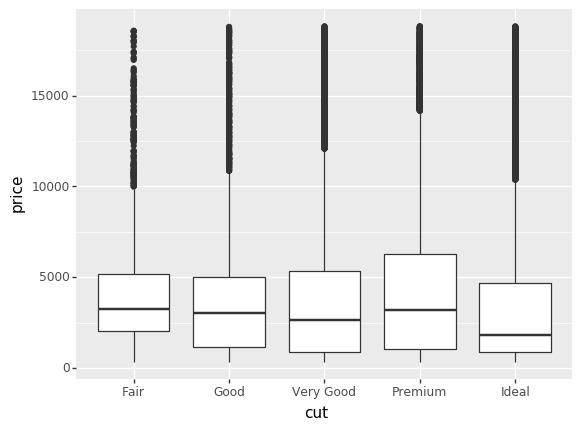

<ggplot: (-9223371890037827424)>

In [181]:
(
ggplot(diamonds,aes(x = 'cut',y = "price"))  
+ geom_boxplot()
)

虽然看不出太多关于分布的信息，但箱线图更加紧凑，因此可以更容易地比较多个类别（也更适合使用一张图来表示）。与前面的图形一样，我们可以从箱线图中发现违反直觉的现象：质量更好的钻石的平均价格更低！

此外，我们看一下mpg 数据集中的class 变量。你可能很想知道公路里程因汽车类别的不
同会有怎样的变化：

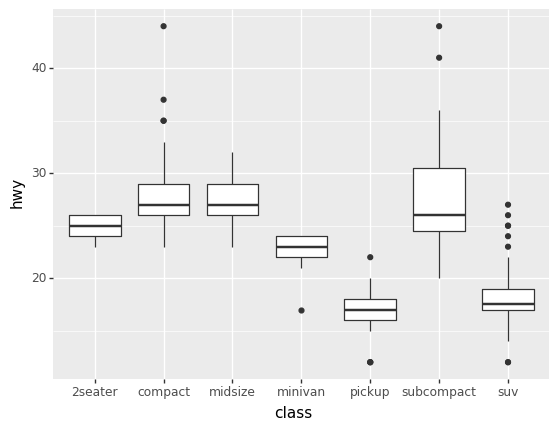

<ggplot: (-9223371950265846296)>

In [132]:
(
ggplot(mpg)  
+ geom_boxplot(aes(
   x = 'class',
   y = 'hwy'
))
)

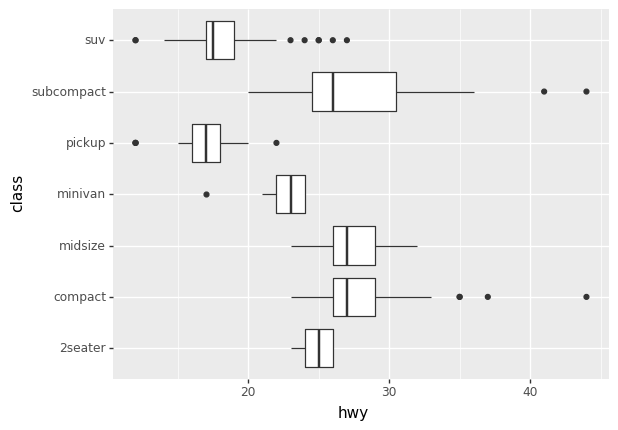

<ggplot: (-9223371950265843436)>

In [124]:
(
ggplot(mpg)  
+ geom_boxplot(aes(
   x = 'class',
   y = 'hwy'
))
+ coord_flip()
)

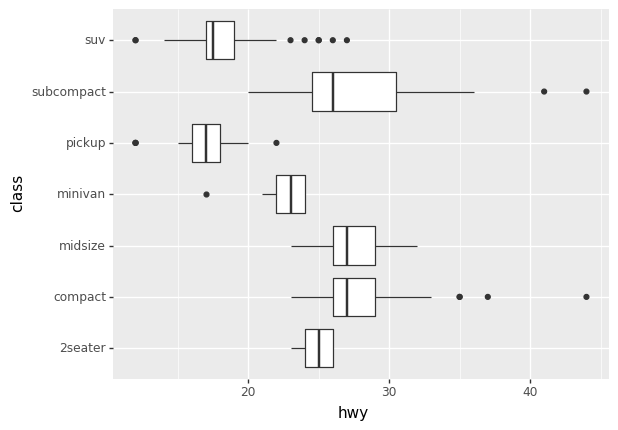

<ggplot: (-9223371890148027984)>

In [211]:
# 如果变量名很长，那么将图形旋转90 度效果会更好一些。可以用coord_flip() 函数操作：
(
ggplot(mpg,aes(x = 'class',y = "hwy"))  
+ geom_boxplot()
    
)

### 7.两个分类变量
要想对两个分类变量间的相关变动进行可视化表示，需要计算出每个变量组合中的观测数量。完成这个任务的其中一种方法是使用内置的geom_count() 函数：

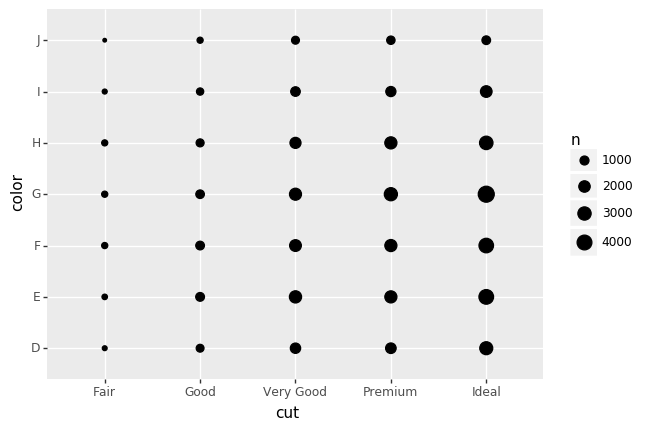

<ggplot: (-9223371890148028124)>

In [212]:
(
ggplot(diamonds,aes(x = 'cut',y = "color"))  
+ geom_count()
)

图中每个圆点的大小表示每个变量组合中的观测数量。相关变动就表示为特定x 轴变量值与特定y 轴变量值之间的强相关关系。

计算变量组合中的观测数量的另一种方法是使用pd.groupby和pd.count()函数：

In [144]:
a=data.groupby(by = ['color','cut'], as_index = False).count()
a.describe()

,carat,clarity,depth,table,price,x,y,z
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,1541.142857,1541.142857,1541.142857,1541.142857,1541.142857,1541.142857,1541.142857,1541.142857
std,1227.222094,1227.222094,1227.222094,1227.222094,1227.222094,1227.222094,1227.222094,1227.222094
min,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
25%,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000
50%,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000
75%,2334.000000,2334.000000,2334.000000,2334.000000,2334.000000,2334.000000,2334.000000,2334.000000
max,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000


接着使用geom_tile() 函数和填充图形属性进行可视化表示:

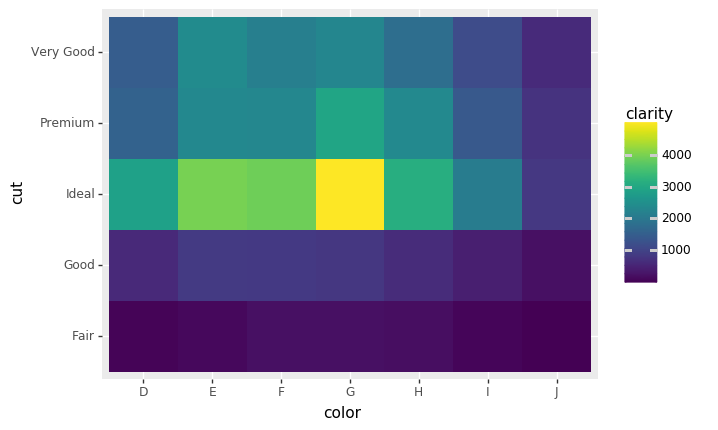

<ggplot: (-9223371950272458076)>

In [145]:
(
ggplot(a,aes(x = 'color', y = 'cut')) 
+ geom_tile(aes(fill = 'clarity'))
)

********
### 8.两个连续变量
对于两个连续变量间的相关变动的可视化表示，我们已经介绍了一种非常好的方法：使用geom_point() 画出散点图。你可以将相关变动看作点的模式。例如，你可以看到钻石的克拉数和价值之间存在一种指数关系：

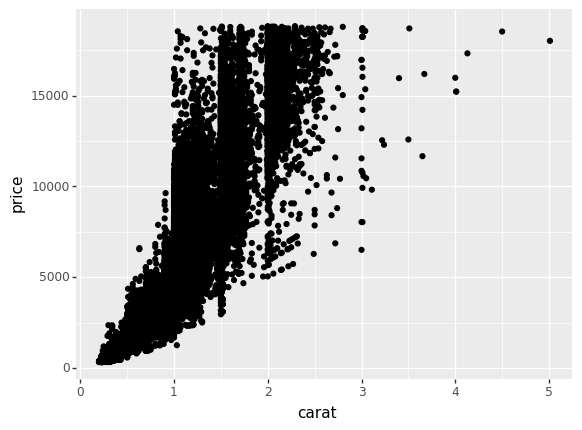

<ggplot: (-9223371890153743440)>

In [228]:
(
ggplot(diamonds) 
+ geom_point(aes(x = 'carat', y = 'price'))
)

随着数据集规模的不断增加，散点图的用处越来越小，因为数据点开始出现过绘制，并堆积在一片黑色区域中（如上面的散点图所示）。我们已经介绍了解决这个问题的一种方法，即使用alpha 图形属性添加透明度：

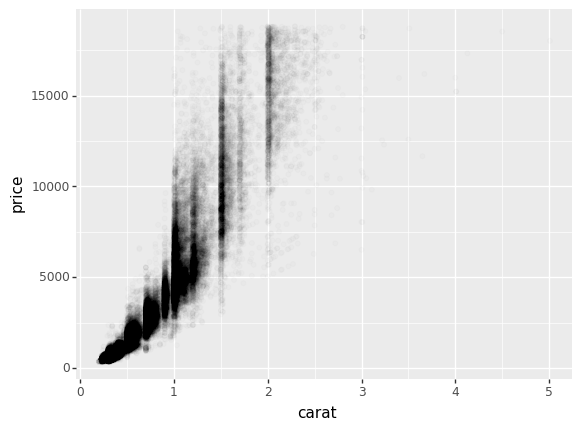

<ggplot: (-9223371890044847152)>

In [229]:
(
ggplot(diamonds) 
+ geom_point(aes(x = 'carat', y = 'price'), alpha = 1/100)
)

但是很难对特别大的数据集使用透明度。另一种解决方法是使用分箱。我们之前使用了
geom_histogram() 和geom_freqpoly() 函数在一个维度上进行分箱，现在学习如何使用
geom_bin2d() 函数在两个维度上进行分箱。

geom_bin2d()函数将坐标平面分为二维分箱，并使用一种填充颜色表示落入每个分箱的数据点。geom_bin2d() 创建长方形分箱。

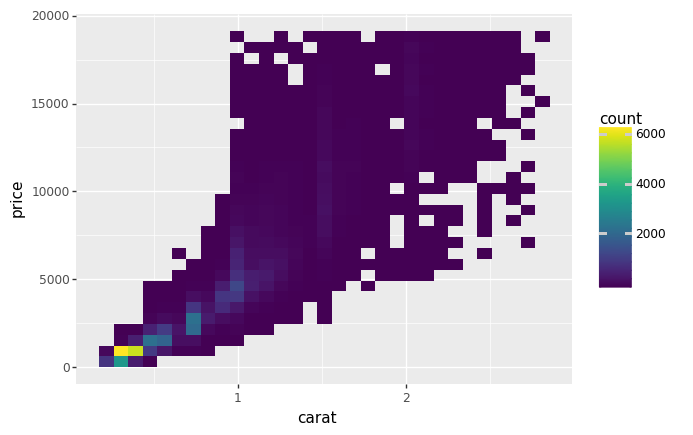

<ggplot: (-9223371890038940948)>

In [230]:
df=data[data.carat<3]
(
ggplot(df) 
+ geom_bin2d(aes(x = 'carat', y = 'price'))
)

另一种方式是对一个连续变量进行分箱，因此这个连续变量的作用就相当于分类变量。接
下来就可以使用前面学过的对分类变量和连续变量的组合进行可视化的技术了。例如，你
可以对carat 进行分箱，然后为每个组生成一个箱线图：

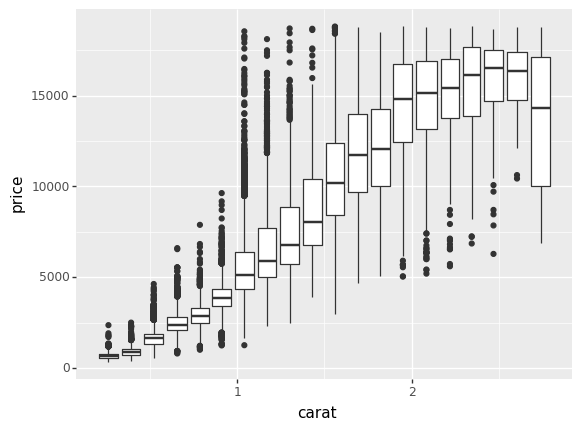

<ggplot: (-9223371950266359652)>

In [99]:
a = pd.cut(df['carat'], 20) #等分为一个有20类的分类变量
(
ggplot(df, aes(x = 'carat', y = 'price')) 
+ geom_boxplot(aes(group = a))
)



默认情况下，不管其中有多少个观测，箱线图看上去都差不多（除了离群点的数量不同），因此很难分辨出每个箱线图是对不同数量的观测进行摘要统计的。如果想要体现这种信息，可以使用参数varwidth = 'TRUE' 让箱线图的宽度与观测数量成正比。

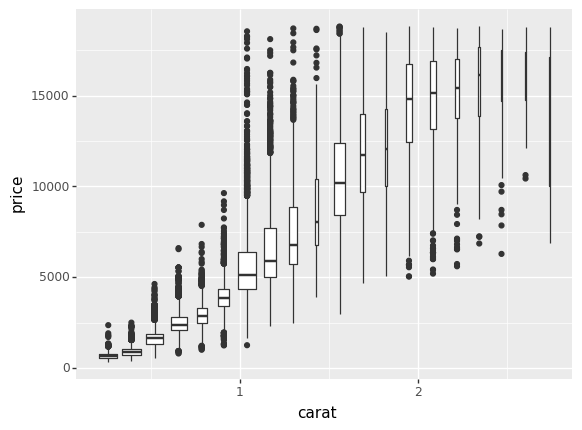

<ggplot: (-9223371950266042804)>

In [100]:
a = pd.cut(df['carat'], 20) #等分为一个有20类的分类变量
(
ggplot(df, aes(x = 'carat', y = 'price')) 
+ geom_boxplot(aes(group = a), varwidth = 'TRUE')
)

### 9. 模式与模型
数据中的模式提供了关系线索。如果两个变量之间存在系统性的关系，那么这种关系就会
在数据中表现为一种模式。如果发现了模式，需要问自己以下几个问题。
* 这种模式的出现会不会是一种巧合（也就是随机的偶然因素）？
* 应该如何描述这种模式中隐含的关系？
* 这种模式中隐含的关系有多强？
* 其他变量会如何影响这种关系？
* 如果对数据的独立分组进行检查，这种关系会有所变化吗？

我们就前面提到的美国黄石国家公园中老忠实喷泉的喷发时长和两次喷发之间的等待时间
做出一张散点图，该图会显示出一个模式：较长的等待时间与较长的喷发时间是相关的。
图中还显示出两个簇，这个我们之前就发现了：

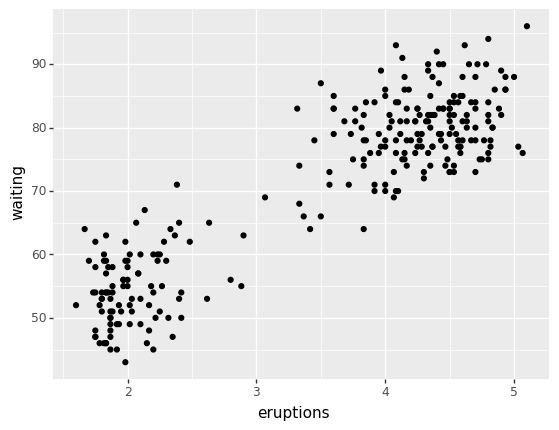

<ggplot: (-9223371890040808136)>

In [238]:
(
ggplot(faithful, aes(x = 'eruptions', y = 'waiting')) 
+ geom_point()
)

模式是数据科学中最有效的工具之一，因为其可以揭示相关变动。如果说变动会生成不确定性，那么相关变动就是减少不确定性。如果两个变量是共同变化的，就可以使用一个变量的值来更好地预测另一个变量的值。如果相关变动可以归因于一种因果关系（一种特殊情况），那么就可以使用一个变量的值来控制另一个变量的值。

模型是用于从数据中抽取模式的一种工具。例如，我们思考一下钻石数据。切割质量与价格之间的关系是很难理解的，因为切割质量和克拉数以及克拉数和价格之间是紧密相关的。我们可以使用模型去除价格和克拉数之间的强关系，这样就可以继续研究剩余的微妙关系。以下代码拟合了一个模型，可以根据carat 预测price，并计算出残差（预测值和实际值之间的差别）。一旦去除克拉数对价格的影响，残差就能反映出钻石的价格：

In [105]:
diamonds2 = diamonds.copy()
diamonds2['log_price']=np.log(diamonds2['price'])
diamonds2['log_carat']=np.log(diamonds2['carat'])
diamonds2

,carat,cut,color,clarity,depth,table,price,x,y,z,log_price,log_carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5.786897,-1.469676
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5.786897,-1.560648
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5.789960,-1.469676
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5.811141,-1.237874
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,5.814131,-1.171183
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,7.921898,-0.328504
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,7.921898,-0.328504
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,7.921898,-0.356675
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,7.921898,-0.150823


In [106]:
import statsmodels.formula.api as sm
model = sm.ols(formula = 'log_price~log_carat',data = diamonds2).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 7.510e+05
Date:                Fri, 13 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:26:13   Log-Likelihood:                -4424.2
No. Observations:               53940   AIC:                             8852.
Df Residuals:                   53938   BIC:                             8870.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.4487      0.001   6190.896      0.0

In [112]:
diamonds2['resid'] = np.exp(model.resid)
diamonds2

,carat,cut,color,clarity,depth,table,price,x,y,z,log_price,log_carat,resid
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5.786897,-1.469676,0.819668
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5.786897,-1.560648,0.954656
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5.789960,-1.469676,0.822182
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5.811141,-1.237874,0.569459
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,5.814131,-1.171183,0.510767
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,7.921898,-0.328504,1.024035
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,7.921898,-0.328504,1.024035
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,7.921898,-0.356675,1.073538
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,7.921898,-0.150823,0.760324


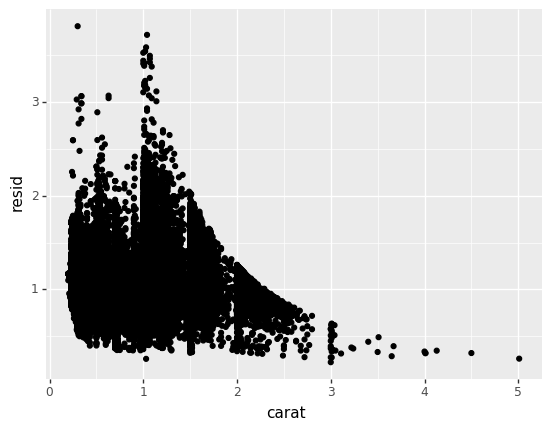

<ggplot: (-9223371950266365908)>

In [113]:
(
ggplot(diamonds2, aes(x = 'carat', y = 'resid')) 
+ geom_point()
)

去除克拉数和价格之间的强关系后，就可以看到预料中的切割质量与价格的关系，对于同样大小的钻石，切割质量更好的钻石更昂贵：

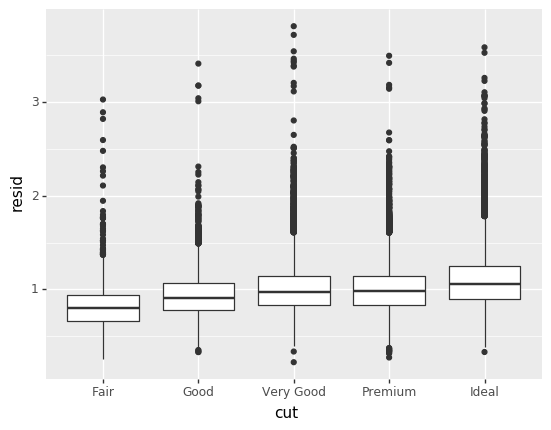

<ggplot: (-9223371950253647572)>

In [115]:
(
ggplot(diamonds2, aes(x = 'cut', y = 'resid')) 
+ geom_boxplot()
)